<a href="https://colab.research.google.com/github/cabamarcos/P1-RRNN/blob/main/P1_RRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 Redes de Neuronas

## 1. Introducción

## 2. Programación del modelo lineal Adaline

In [79]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos los datos en un mismo dataframe para posteriormente poder aleatorizarlos

In [69]:
archivos_csv = ['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv', 'gt_2015.csv']

df_final = pd.DataFrame()

for archivo in archivos_csv:
    # Leer el archivo CSV y cargarlo en un DataFrame temporal
    df_temporal = pd.read_csv(archivo)

    # Concatenar el DataFrame temporal con el DataFrame final
    df_final = pd.concat([df_final, df_temporal], ignore_index=True)


In [84]:
matriz_correlacion = df_final.corr().abs()

matriz_correlacion

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,0.406601,0.476291,0.251974,0.045851,0.183706,0.281869,0.091152,0.015287,0.174326,0.558174
AP,0.406601,1.000000,0.015184,0.040363,0.057533,0.005390,0.225601,0.118224,0.102636,0.067050,0.191938
AH,0.476291,0.015184,1.000000,0.147840,0.235153,0.221809,0.022965,0.137360,0.196275,0.106586,0.164617
AFDP,0.251974,0.040363,0.147840,1.000000,0.678485,0.691292,0.466882,0.665483,0.702568,0.448425,0.188247
GTEP,0.045851,0.057533,0.235153,0.678485,1.000000,0.874234,0.699703,0.964127,0.978470,0.518909,0.201630
TIT,0.183706,0.005390,0.221809,0.691292,0.874234,1.000000,0.380862,0.910297,0.908469,0.706275,0.213865
TAT,0.281869,0.225601,0.022965,0.466882,0.699703,0.380862,1.000000,0.682396,0.706438,0.058353,0.092791
TEY,0.091152,0.118224,0.137360,0.665483,0.964127,0.910297,0.682396,1.000000,0.988778,0.569813,0.116127
CDP,0.015287,0.102636,0.196275,0.702568,0.978470,0.908469,0.706438,0.988778,1.000000,0.551027,0.171256
CO,0.174326,0.067050,0.106586,0.448425,0.518909,0.706275,0.058353,0.569813,0.551027,1.000000,0.340606


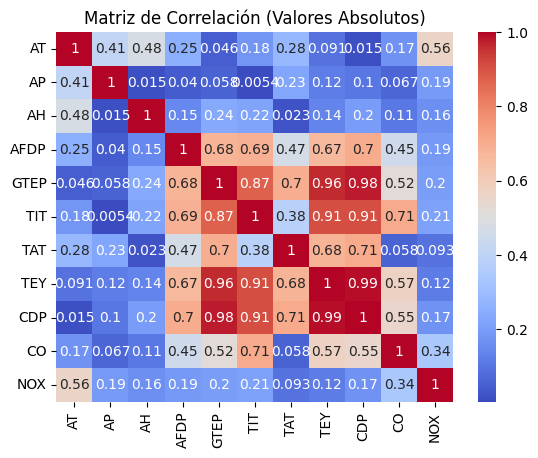

In [85]:
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Valores Absolutos)')
plt.show()

Ahora aleatorizamos los datos

In [91]:
datos = df_final.sample(frac=1, random_state=random.seed(123))
X = datos.drop("TEY", axis = 1)
y = datos["TEY"]
X


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
13883,15.0220,1017.9,75.762,4.2234,24.391,1087.7,550.22,11.960,1.87490,71.528
8103,6.5983,1008.2,89.985,4.0141,20.020,1036.9,536.05,10.467,7.86150,96.276
35221,17.8170,1018.5,81.803,2.8772,20.776,1057.9,549.80,10.849,3.52600,50.642
8461,9.9517,1014.2,69.061,5.7892,32.936,1099.9,529.35,13.881,0.46854,66.695
35383,10.6280,1019.2,81.938,2.6574,18.517,1046.5,550.14,10.409,5.44800,61.515
...,...,...,...,...,...,...,...,...,...,...
8690,17.7370,1024.9,62.859,4.4611,22.749,1076.0,550.17,11.393,1.66410,76.234
10267,22.8870,1011.0,62.748,4.0578,25.354,1089.3,549.68,12.053,1.38430,74.521
32623,19.3070,1012.1,67.217,3.5464,25.300,1083.7,549.96,12.101,0.83791,55.629
22580,4.3905,1002.4,93.679,3.1157,22.096,1061.0,550.34,11.165,2.66380,66.466


In [72]:
# Verificar si hay valores nulos
if datos.isnull().values.any():
    print("Hay valores nulos en la matriz.")
else:
    print("No hay valores nulos en la matriz.")

No hay valores nulos en la matriz.


In [73]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 14263 to 16471
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [74]:
for columna in datos:
  min = datos[columna].min()
  max = datos[columna].max()
  datos[columna] = (datos[columna] - min)/(max - min)

print(datos)

             AT        AP        AH      AFDP      GTEP       TIT       TAT  \
14263  0.332806  0.607882  0.916061  0.115513  0.264662  0.832168  0.986859   
16321  0.470347  0.625616  0.774749  0.181073  0.283257  0.851149  0.984332   
31759  0.628892  0.653202  0.427183  0.361240  0.687636  0.991009  0.757645   
2347   0.448472  0.466010  0.998949  0.265933  0.202972  0.735265  0.980541   
16316  0.488807  0.647291  0.829377  0.374928  0.644018  0.991009  0.486732   
...         ...       ...       ...       ...       ...       ...       ...   
7944   0.236041  0.653202  0.918912  0.705841  0.719915  0.991009  0.352034   
12044  0.631061  0.605911  0.784313  0.238050  0.100356  0.575425  0.981804   
13719  0.643498  0.434483  0.784720  0.276977  0.091233  0.557443  0.987364   
28595  0.307655  0.678818  0.775852  0.077835  0.162612  0.624376  0.983826   
16471  0.389378  0.623645  0.672390  0.383274  0.671996  0.991009  0.423048   

            TEY       CDP        CO       NOX  
142

In [75]:
class Adaline:
  def __init__(self, learning_rate=0.001, n_iter = 1000, random_seed = 28):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.random_seed = random_seed
    self.weights = None
    self.umbral = 0
    self.costes = []

  def fit(self, X, y):
    """ Método que entrena el modelo """
    # Inicializamos el modelo
    self.__initialize_Adaline(X)
    # Realizamos la modificación de los pesos n_iter veces
    for i in range(self.n_iter):
      # Obtenemos la salida
      salida = np.dot(X, self.weights) + self.umbral
      # Obtenemos los errrores
      errores = y - salida
      # Actualizamos el vector de pesos
      self.weights += self.learning_rate * X.T.dot(errores)
      # Actualizamos el umbral
      self.umbral += self.learning_rate * np.sum(errores)
      # Obtenemos y guardamos el coste para cada época
      coste = (errores**2).sum() / 2.0
      self.costes.append(coste)


  def __initialize_Adaline(self, X):
    """ Método privado que inicializa los pesos y el umbral del Adaline de forma aleatoria """
    # Inicializamos la semilla de aleatoriedad
    np.random.seed(self.random_seed)
    # Generamos tantos números aleatorios desde -1 hasta 1 como atributos tenga el conjunto
    self.weights = np.random.uniform(-1, 1, size=(X.shape[1]))
    # Generamos el umbral de manera aleatoria
    self.umbral = np.random.uniform(-1, 1)

Comprobamos nuestra implementación del Adaline utilizando los datos artificiales proporcionados en aulaglobal.

In [76]:
data = pd.read_csv("datosArtificiales.txt", delimiter=' ', header=None)

X = data.iloc[:,:2]
print(X.head(5))

y = data.iloc[:,-1]
print(y.head(6))

          0         1
0  0.075144  0.208514
1  0.955954  0.504891
2  0.126028  0.301368
3  0.584149  0.734279
4  0.298572  0.491662
0    0.941773
1    2.407016
2    0.950687
3    1.434018
4    1.105482
5    0.758963
Name: 2, dtype: float64


In [77]:
modelo = Adaline()
modelo.fit(X,y)
print(modelo.costes)

[2076.3280166311943, 634.0853402876381, 245.86732324393924, 132.69625664990016, 92.69588647498983, 73.3232409296947, 60.71413214901114, 51.053217610814826, 43.16149666885429, 36.57297616953956, 31.03212482700233, 26.359649285452264, 22.414230841168155, 19.07966197011835, 16.259036934719198, 13.87117197598524, 11.847940927613841, 10.132130919688354, 8.675669584028386, 7.438146588340415, 6.385577145660816, 5.489366871252716, 4.725444827607409, 4.073537238028926, 3.516558908036073, 3.040103164688498, 2.6320142661912365, 2.2820288586713238, 1.9814752508108004, 1.7230211112575642, 1.5004617275390073, 1.3085422478864155, 1.1428084001319776, 0.9994810790878005, 0.8753509443280545, 0.7676897981199144, 0.6741760384881308, 0.5928319218558211, 0.5219707374274238, 0.46015230321198386, 0.40614545114344286, 0.3588963843472265, 0.3175019700916176, 0.28118718308595203, 0.2492860403433802, 0.2212254748256718, 0.19651168388634033, 0.17471856293201493, 0.15547789707717863, 0.13847103583695977, 0.12342181

Podemos observar que, efectivamente, el error cuadrático medio desciende en cada época, y se va aproximando a 0

Vamos a dividir los datos en conjuntos train, test y validacion


In [86]:
# Dividir los datos originales en conjuntos de entrenamiento (70%) y prueba (30%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir el conjunto de prueba en conjuntos de validación (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)